<a href="https://colab.research.google.com/github/ngoantnut/WineQualityPred/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the Dataset**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ngoantnut/WineQualityPred/main/train1.csv")
dft = pd.read_csv("https://raw.githubusercontent.com/ngoantnut/WineQualityPred/main/test1.csv")

In [3]:
print(df.head())

   Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   1            8.7              0.34         0.46            13.8   
1   2            5.6              0.26         0.00            10.2   
2   3            7.9              0.25         0.29             5.3   
3   4            6.7              0.24         0.33            12.3   
4   5            7.0              0.27         0.74             1.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.055                 68.0                 198.0  0.99880  3.36   
1      0.038                 13.0                 111.0  0.99315  3.44   
2      0.031                 33.0                 117.0  0.99180  3.06   
3      0.046                 31.0                 145.0  0.99830  3.36   
4      0.173                 34.0                 121.0  0.99334  3.04   

   sulphates  alcohol  quality  
0       0.37      9.5        6  
1       0.46     12.4        6  
2       0.32     11.8        

In [4]:
df['quality'].value_counts()

6    2258
5    1716
7     882
4     165
8     147
3      27
9       5
Name: quality, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    5200 non-null   int64  
 1   fixed acidity         5200 non-null   float64
 2   volatile acidity      5200 non-null   float64
 3   citric acid           5200 non-null   float64
 4   residual sugar        5200 non-null   float64
 5   chlorides             5200 non-null   float64
 6   free sulfur dioxide   5200 non-null   float64
 7   total sulfur dioxide  5200 non-null   float64
 8   density               5200 non-null   float64
 9   pH                    5200 non-null   float64
 10  sulphates             5200 non-null   float64
 11  alcohol               5200 non-null   float64
 12  quality               5200 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 528.2 KB


Đây là tệp dữ liệu rất đầy đủ, vì thế ta không cần quá trình xử lý dữ liệu missing.
 Tệp dữ liệu có gần 5200 mẫu, với 13 cột:
0. Id: Đánh số thứ tự các mẫu dữ liệu
1. fixed acidity: Các axit cố định chủ yếu được tìm thấy trong rượu vang là tartaric, malic, citric và succinic.
2. volatile acidity: Độ axit dễ bay hơi đề cập đến các axit có thể chưng cất bằng hơi nước có trong rượu vang, chủ yếu là axit axetic nhưng cũng có các axit lactic, formic, butyric và propionic.
3. citric acid: Axit citric là một axit hữu cơ yếu có công thức hóa học là C6H8O7. Nó xuất hiện tự nhiên trong trái cây họ cam quýt. Axit xitric có thể thêm 'độ tươi' và hương vị cho rượu vang
4. residual sugar: Đường dư là đường nho tự nhiên còn sót lại trong rượu sau khi quá trình lên men rượu. Nó được đo bằng gam trên lít. Lượng đường còn lại sau khi ngừng lên men, hiếm khi tìm thấy những loại rượu nhỏ hơn 1 gam / lít và những loại rượu lớn hơn 45 gam / lít được coi là ngọt.
5. chlorides: Lượng muối trong rượu
6. free sulfur dioxide:  Lưu huỳnh đioxit tự do là thước đo lượng SO2 không liên kết với các phân tử khác, và được sử dụng để tính phân tử SO2
7. total sulfur dioxide: Tổng lưu huỳnh đioxit (SO2) là thước đo của cả dạng liên kết và tự do của SO2
8. density:
9. pH: mô tả mức độ axit hoặc bazơ của rượu trên thang từ 0 (rất axit) đến 14 (rất bazơ); hầu hết các loại rượu đều nằm trong khoảng 3-4 trên thang độ pH
10. sulphates: một phụ gia rượu vang có thể góp phần vào mức khí sulfur dioxide, hoạt động như một chất chống vi khuẩn và chất chống oxy hóa
11. alcohol: nồng độ cồn trong rượu, được đánh giá theo %
12. quality: chất lượng rượu được đánh giá theo thang điểm 0-10


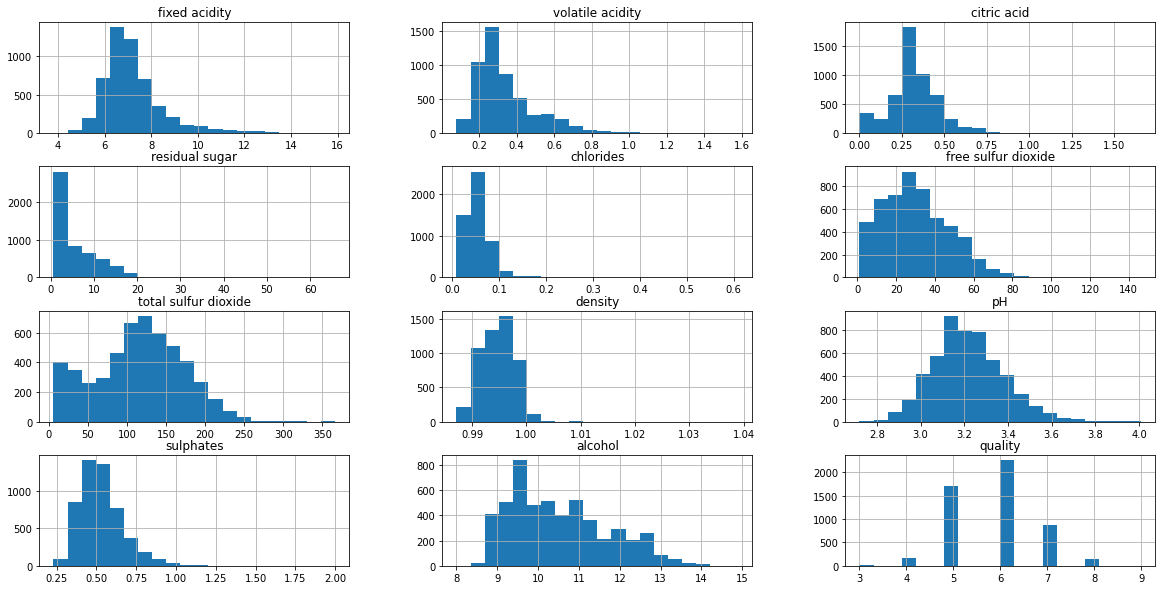

 wine histogram


In [6]:

df.iloc[:, 1:].hist(bins=20, figsize=(20, 10))
plt.show()
    
print(' wine histogram')    


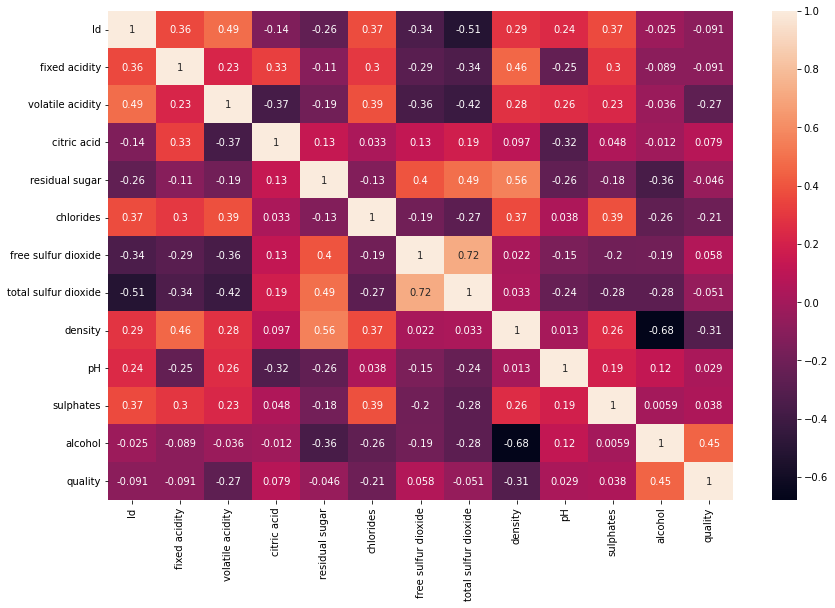

In [7]:
plt.subplots(figsize=(14,9))
sns.heatmap(df.corr(),annot=True)

Dựa theo bản đồ tuong quan trên, ta thấy alcohol ảnh hưởng đến chất lượng rượu nhiều nhất

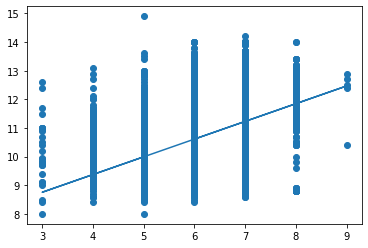

In [8]:

from scipy import stats
z= df.iloc[:, -1].values
k= df.iloc[:, -2].values

slope, intercept, r, p, std_err = stats.linregress(z, k)

def myfunc(z):
  return slope * z + intercept

mymodel = list(map(myfunc, z))

plt.scatter(z, k)
plt.plot(z, mymodel)
plt.show()

In [9]:
df.columns

Index(['Id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

Ta thấy là cột ID hoàn toàn chỉ là đếm số TT, không ảnh hưởng đến kết quả chất lượng rượu. Vì vậy ta tạm loại bỏ nó

In [10]:
df.drop(["Id"],axis = 1,inplace = True)

In [11]:
ids = dft['Id']
dft.drop(["Id"],axis = 1,inplace = True)

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.7,0.34,0.46,13.8,0.055,68.0,198.0,0.99880,3.36,0.37,9.5,6
1,5.6,0.26,0.00,10.2,0.038,13.0,111.0,0.99315,3.44,0.46,12.4,6
2,7.9,0.25,0.29,5.3,0.031,33.0,117.0,0.99180,3.06,0.32,11.8,7
3,6.7,0.24,0.33,12.3,0.046,31.0,145.0,0.99830,3.36,0.40,9.5,5
4,7.0,0.27,0.74,1.3,0.173,34.0,121.0,0.99334,3.04,0.46,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
5195,7.9,0.18,0.40,2.2,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,5
5196,9.9,0.25,0.46,1.7,0.062,26.0,42.0,0.99590,3.18,0.83,10.6,6
5197,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
5198,7.8,0.56,0.19,2.0,0.081,17.0,108.0,0.99620,3.32,0.54,9.5,5


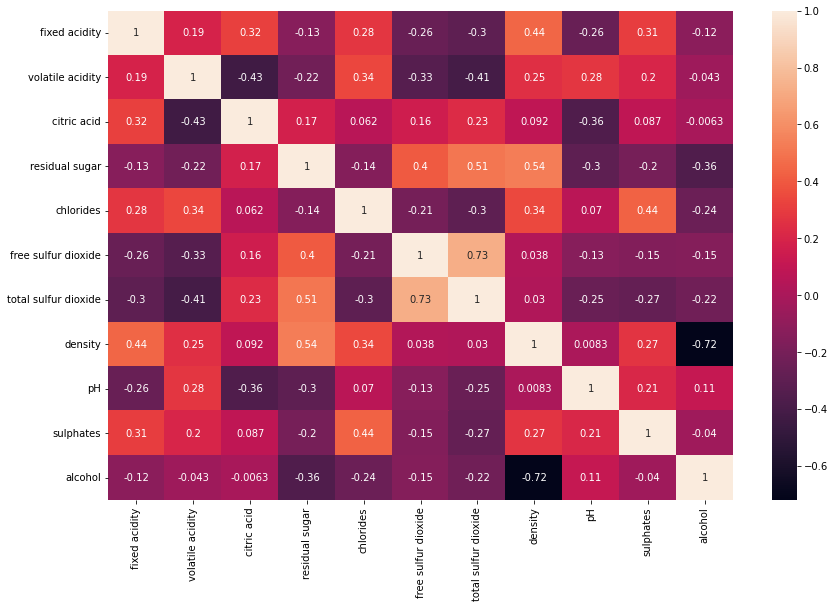

In [28]:
plt.subplots(figsize=(14,9))
sns.heatmap(dft.corr(),annot=True)

Dữ liệu cần kiểm chứng

In [13]:
dft

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.9,0.19,0.28,5.0,0.058,14.0,146.0,0.99520,3.29,0.36,9.1
1,5.9,0.29,0.28,3.2,0.035,16.0,117.0,0.98959,3.26,0.42,12.6
2,10.0,0.35,0.45,2.5,0.092,20.0,88.0,0.99918,3.15,0.43,9.4
3,7.1,0.18,0.49,1.3,0.033,12.0,72.0,0.99072,3.05,0.53,11.3
4,10.2,0.29,0.49,2.6,0.059,5.0,13.0,0.99760,3.05,0.74,10.5
...,...,...,...,...,...,...,...,...,...,...,...
1292,7.3,0.28,0.36,12.7,0.040,38.0,140.0,0.99800,3.30,0.79,9.6
1293,7.0,0.23,0.32,1.8,0.048,25.0,113.0,0.99150,3.11,0.47,11.1
1294,7.9,0.35,0.36,1.6,0.038,11.0,124.0,0.99280,3.25,0.48,11.0
1295,6.4,0.28,0.28,3.0,0.040,19.0,98.0,0.99216,3.25,0.47,11.1


Ta thấy ở dữ liệu test này không có cột chất lượng cung cấp sẵn, vì đây là phần mà ta phải làm

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
X = df.iloc[:, 1:13].values
y = df.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
print('a=',lr.coef_)
print('b=',lr.intercept_)

a= [[-1.37004466e-02 -2.14830198e-02 -4.48010068e-02 -2.80323148e-03
   4.71868832e-02  3.47762521e-02 -5.71152760e-02 -1.86226242e-01
  -3.92222951e-02 -6.25987156e-01 -5.42106273e-01]
 [ 6.81614267e-02 -8.48847641e-03 -4.67109957e-02  4.35942593e-03
  -9.44449450e-02  1.48363925e-02  4.42310147e-02  1.56748487e-01
   1.13588333e-02  3.74025304e-01 -5.49247726e-01]
 [ 4.09055909e-01  3.72015713e-02  8.86861029e-02  7.15045633e-02
  -1.25307302e-05 -7.60358904e-04  3.41239723e-01  1.08567090e+00
   2.08893437e-01  7.20943573e-01 -1.71659580e+00]
 [-1.47077904e-01  3.82347788e-02  6.16433215e-02 -6.06419598e-03
  -1.42819583e-02 -8.61787294e-03 -1.27772971e-02 -6.01137968e-02
   1.13131316e-02  6.43259940e-02  6.94626949e-01]
 [-2.48538198e-01 -2.56715108e-02  5.00043696e-02 -4.96372263e-02
   1.27221616e-03 -1.85163129e-02 -2.21325993e-01 -6.91088023e-01
  -1.20483031e-01 -2.31862905e-01  1.56605431e+00]
 [-5.24803103e-02 -1.36642954e-02 -6.17200772e-02 -1.44453942e-02
   3.41273692e-0

In [20]:
dz = pd.DataFrame({'Gt chính xác': y_test, 'Dự đoán': y_pred})
print(dz)

      Gt chính xác  Dự đoán
0                6        5
1                6        6
2                6        6
3                6        6
4                6        6
...            ...      ...
1295             6        6
1296             6        6
1297             6        6
1298             6        6
1299             5        5

[1300 rows x 2 columns]


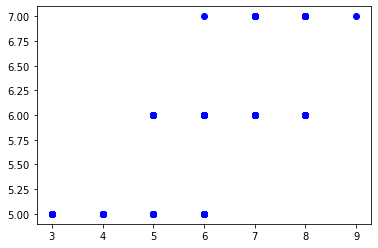

In [21]:
plt.plot(y_test, y_pred,'bo')


In [22]:
accuracy_score(y_test,y_pred)

0.696923076923077

Lưu model để sử dụng sau này

In [23]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(lr, open(filename, 'wb'))

test và lưu nó lại

In [24]:
test = lr.predict(dft)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [25]:
Predf = pd.DataFrame(columns=["Id",'quality'])
Predf['Id']= ids
Predf['quality']= test

In [26]:
Predf

,Id,quality
0,5201,5
1,5202,5
2,5203,5
3,5204,5
4,5205,7
...,...,...
1292,6493,5
1293,6494,5
1294,6495,5
1295,6496,5


In [27]:
Predf.to_csv('Solution.csv',index=False)